<a href="https://colab.research.google.com/github/mpbaloyi/portfolio/blob/main/Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
#because the file uses another encoding named latin-1
df = pd.read_csv("mexico-real-estate_raw.csv", encoding="latin-1")
df.head()


,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [18]:
df.shape

(700, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               700 non-null    int64  
 1   property_type            700 non-null    object 
 2   place_with_parent_names  700 non-null    object 
 3   lat-lon                  582 non-null    object 
 4   area_m2                  700 non-null    int64  
 5   price_usd                700 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 32.9+ KB


In [20]:
#Droping the "unnamed" column
df=df.drop("Unnamed: 0", axis=1)
df.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    int64  
 4   price_usd                700 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 27.5+ KB


It looks like there are a couple of problems in this DataFrame that we need to solve. First, there are many rows with NaN values in the "lat" and "lon" columns. Second, there is a lot of missing values.


In [22]:
# Droping null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            582 non-null    object 
 1   place_with_parent_names  582 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  582 non-null    int64  
 4   price_usd                582 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 27.3+ KB


In [23]:
#splitting the "lat-lon" column into two columns
df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True)


df.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


In [24]:
#Dropping the "lat-lon" column since we no longer need it
df.drop("lat-lon", axis=1, inplace=True)
df.head()

,property_type,place_with_parent_names,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,71,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,233,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,300,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,84,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,175,102763.00,20.689157,-103.366728


Using the "place_with_parent_names" column to create a "state" column for df. (Note that the state name always appears after "|Mexico|" in each string.)


In [26]:
df["state"]=df["place_with_parent_names"].str.split("|",expand=True)[2]
df.head()

,property_type,place_with_parent_names,area_m2,price_usd,lat,lon,state
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,71,48550.59,19.525890,-99.151703,Distrito Federal
1,house,|México|Estado de México|Toluca|Metepec|,233,168636.73,19.264054,-99.572753,Estado de México
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,300,86932.69,19.268629,-99.671722,Estado de México
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,|México|Jalisco|Guadalajara|,175,102763.00,20.689157,-103.366728,Jalisco


In [27]:
df.drop("place_with_parent_names", axis=1, inplace=True)
df.head()

,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71,48550.59,19.525890,-99.151703,Distrito Federal
1,house,233,168636.73,19.264054,-99.572753,Estado de México
2,house,300,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175,102763.00,20.689157,-103.366728,Jalisco


In [28]:
df["lat"]=df["lat"].astype(float)
df["lon"]=df["lon"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  582 non-null    object 
 1   area_m2        582 non-null    int64  
 2   price_usd      582 non-null    float64
 3   lat            582 non-null    float64
 4   lon            582 non-null    float64
 5   state          582 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 31.8+ KB


**Creating a map-based scatter plot using Plotly Express.**

In [32]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": 23.6345, "lon": -102.5528},  # Center on Mexico
    width=600,
    height=600,
    hover_data=["price_usd"],# Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()



Using the describe method to create a DataFrame summary_stats with the summary statistics for the "**area_m2**" and "**price_usd**" columns

In [33]:
summary_stats = df[["area_m2","price_usd"]].describe()
summary_stats


,area_m2,price_usd
count,582.000000,582.000000
mean,170.037801,116313.970911
std,83.208768,65919.612586
min,60.000000,33192.480000
25%,100.000000,62613.202500
50%,159.000000,100655.040000
75%,218.000000,155315.762500
max,380.000000,326733.660000


# Summary of Descriptive Statistics

The dataset contains 582 real estate listings.
On average, properties are 170 m² in size with an average price of $116,314 USD.


*   Property sizes range from 60 m² to 380 m², indicating a wide variety of home sizes.
*   25% of properties are below 100 m², and 75% are below 218 m², meaning most listings fall between 100 m² and 218 m², with the median size at 159 m².

 Regarding prices:


*   Prices range between $33,192 and $326,734 USD, showing significant price variation in the market.

*   The median price is 100,655 USD, slightly lower than the mean, suggesting a few higher-priced properties may be pulling the average upward.
*   The higher standard deviation (~$65,919) also supports the presence of price differences across listings.





Text(0.5, 1.0, 'Distribution of Home Prices')

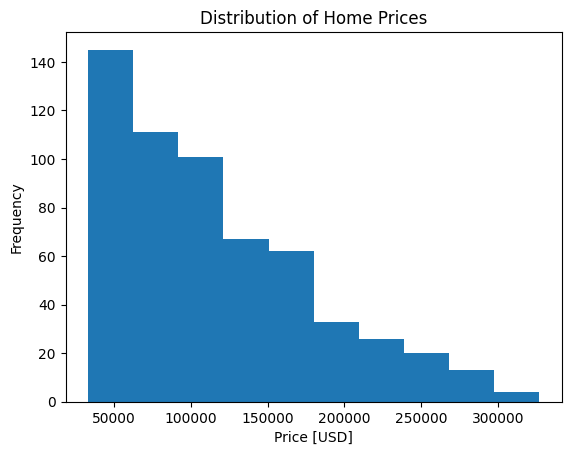

In [34]:
# Creating a histogram
plt.hist(df["price_usd"])


# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")


# Add title
plt.title("Distribution of Home Prices")


# Analysis: Distribution of Home Prices

The distribution of home prices is right-skewed, meaning:


*   Most properties are priced on the lower end, around $50,000 to $150,000 USD.

*   As the price increases, the frequency of listings drops significantly.
*   Very few homes are priced above $250,000 USD, making high-value properties less common.


This pattern indicates that the market is dominated by lower-priced homes, while expensive listings exist but represent a small portion of the market.

# Key Insight

➡ The right-skew suggests that a small number of high-priced properties raise the average price, which aligns with why the mean price ($116k)  is higher than the median price (100k USD) — the outliers push the average up.

Text(0.5, 1.0, 'Distribution of Home Sizes')

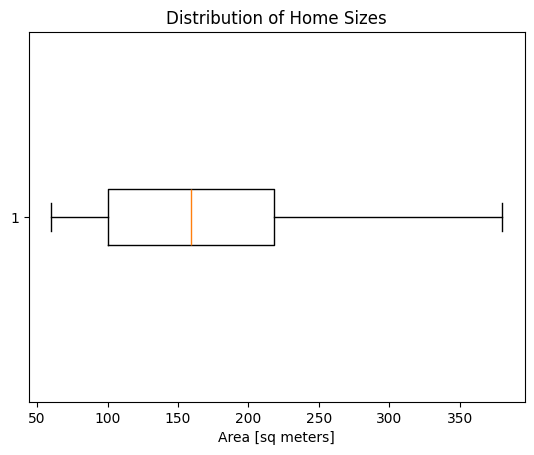

In [35]:
# Creating box plot
plt.boxplot(df["area_m2"],vert=False)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")


# The boxplot shows that:


*   The median home size is around 160 m², meaning half of the homes are smaller and half are larger than this value.

*   Most properties fall between approximately 100 m² and 210 m², indicating that these are the most common home sizes in the dataset.
*   The left whisker extends to around 60 m², showing some smaller compact properties.


*   The right whisker extends close to 380 m², suggesting a number of larger, spacious homes, though there are fewer of them.


The length of the whiskers suggests greater variation on the higher end, meaning there is more diversity in the size of larger homes than smaller ones.

# Key Insight

➡ The housing market contains mostly mid-sized homes, with a smaller number of very large properties contributing to an extended upper range of home sizes. This may indicate different property categories (e.g., standard vs. luxury homes).

In [37]:
mean_price_by_region = df.groupby("state")["price_usd"].mean().sort_values(ascending=True)
mean_price_by_region


,price_usd
state,
Tlaxcala,35826.800000
Baja California,57753.971000
Oaxaca,59681.585000
Durango,64145.790000
Colima,66443.835000
Tamaulipas,89981.871818
Hidalgo,91061.136000
Sinaloa,97015.777500
Veracruz de Ignacio de la Llave,103643.520526


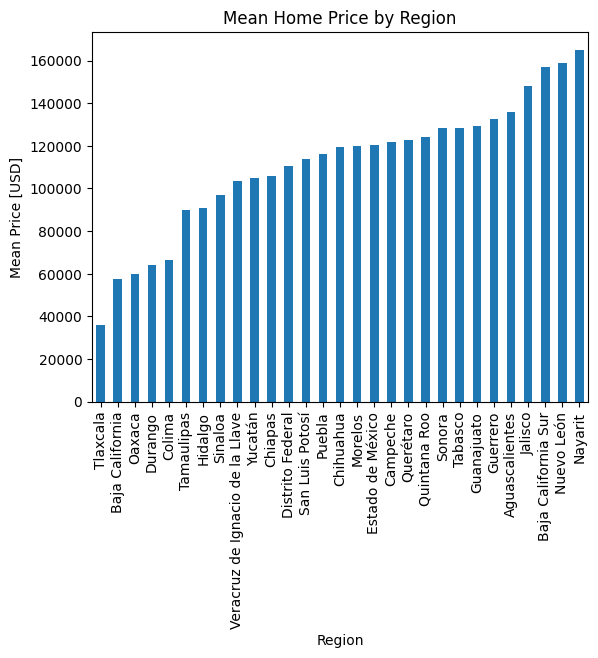

In [38]:
# Building a bar chart
mean_price_by_region.plot(
    kind="bar",
    xlabel="Region",
    ylabel="Mean Price [USD]",
    title="Mean Home Price by Region"
);


# Analysis: Average Home Price by Region (State)

The results reveal significant variation in the average price of homes across different Mexican states:

*   Tlaxcala has the lowest average price at approximately $35,827 USD, indicating a more affordable housing market.

*   Other lower-priced regions include Baja California, Oaxaca, and Durango, all averaging below $65,000 USD.

*   On the higher end, states like Nuevo León, Baja California Sur, and Nayarit have average prices above $150,000 USD, making them the most expensive markets in the dataset.



This variation suggests that location has a strong influence on property pricing, likely driven by:


*   Demand and population density

*   Tourism and coastal proximity


*   Economic development and job opportunities
*   Infrastructure and urban growth



# Key Insight

➡ There is a clear price gap between states with lower economic or rural characteristics and popular or coastal states, highlighting how regional demand shapes real estate value.